In [1]:
#Sentiment Analysis Program

In [4]:
#importing libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [5]:
#Load data
%store -r news
df = news
df.head()

,Date,Source,Headline
0,"Friday, July 31, 2020 07:00:03 PM (GMT)",SA,Soybeans maintained gains as the EIA's Monthly...
1,"Friday, July 31, 2020 07:00:03 PM (GMT)",SA,Wheat pared gains in the afternoon as traders ...
2,"Friday, July 31, 2020 07:00:03 PM (GMT)",SA,Corn was slightly lower and finished the week ...
3,"Wednesday, July 29, 2020 07:00:14 PM (GMT)",SA,Wheat furthered intraday gains ahead of weekly...
4,"Wednesday, July 29, 2020 07:00:14 PM (GMT)",SA,Soybeans settled with a small loss amid limite...


In [7]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create 2 new columns
df['Subjectivity'] = df['Headline'].apply(getSubjectivity)
df['Polarity'] = df['Headline'].apply(getPolarity)

#Show new dataframe
df

,Date,Source,Headline,Subjectivity,Polarity
0,"Friday, July 31, 2020 07:00:03 PM (GMT)",SA,Soybeans maintained gains as the EIA's Monthly...,0.000000,0.000000
1,"Friday, July 31, 2020 07:00:03 PM (GMT)",SA,Wheat pared gains in the afternoon as traders ...,0.600000,-0.066667
2,"Friday, July 31, 2020 07:00:03 PM (GMT)",SA,Corn was slightly lower and finished the week ...,0.310417,-0.016667
3,"Wednesday, July 29, 2020 07:00:14 PM (GMT)",SA,Wheat furthered intraday gains ahead of weekly...,0.187500,-0.062500
4,"Wednesday, July 29, 2020 07:00:14 PM (GMT)",SA,Soybeans settled with a small loss amid limite...,0.335714,-0.102232
...,...,...,...,...,...
104,"Tuesday, June 02, 2020 07:00:04 PM (GMT)",SA,Corn was little changed throughout the session...,0.333333,0.020833
105,"Tuesday, June 02, 2020 07:00:04 PM (GMT)",SA,Wheat pulled back to session lows as investors...,0.000000,0.000000
106,"Monday, June 01, 2020 07:00:03 PM (GMT)",SA,Soybeans gave back earlier gains to settle nea...,0.256250,-0.081250
107,"Monday, June 01, 2020 07:00:03 PM (GMT)",SA,"Corn settled in the red, but off mid-morning l...",0.133333,-0.033333


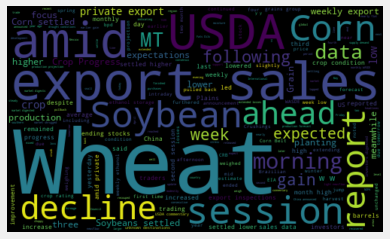

In [10]:
# Plot Word Cloud
allwords = ' '.join( [twts for twts in df['Headline']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size=119).generate(allwords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [11]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#Add new column to get the analysis of news articles
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#show df
df

,Date,Source,Headline,Subjectivity,Polarity,Analysis
0,"Friday, July 31, 2020 07:00:03 PM (GMT)",SA,Soybeans maintained gains as the EIA's Monthly...,0.000000,0.000000,Neutral
1,"Friday, July 31, 2020 07:00:03 PM (GMT)",SA,Wheat pared gains in the afternoon as traders ...,0.600000,-0.066667,Negative
2,"Friday, July 31, 2020 07:00:03 PM (GMT)",SA,Corn was slightly lower and finished the week ...,0.310417,-0.016667,Negative
3,"Wednesday, July 29, 2020 07:00:14 PM (GMT)",SA,Wheat furthered intraday gains ahead of weekly...,0.187500,-0.062500,Negative
4,"Wednesday, July 29, 2020 07:00:14 PM (GMT)",SA,Soybeans settled with a small loss amid limite...,0.335714,-0.102232,Negative
...,...,...,...,...,...,...
104,"Tuesday, June 02, 2020 07:00:04 PM (GMT)",SA,Corn was little changed throughout the session...,0.333333,0.020833,Positive
105,"Tuesday, June 02, 2020 07:00:04 PM (GMT)",SA,Wheat pulled back to session lows as investors...,0.000000,0.000000,Neutral
106,"Monday, June 01, 2020 07:00:03 PM (GMT)",SA,Soybeans gave back earlier gains to settle nea...,0.256250,-0.081250,Negative
107,"Monday, June 01, 2020 07:00:03 PM (GMT)",SA,"Corn settled in the red, but off mid-morning l...",0.133333,-0.033333,Negative


In [13]:
#Print all positive articles
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Headline'][i])
        print()
        j = j + 1


1) Wheat pulled back from yesterday's three-month high despite stronger than expected weekly export sales

2) Soybeans reached a two-month high as the Buenos Aires Grain Exchange was said to report a near-completed harvest in the country; meanwhile, the USDA announced private export sales of 120K MT to unknown destinations

3) Soybeans extended gains to a four-month high amid reported expectations for a y/y jump in May crushings ahead of the Fats & Oils report expected later this afternoon

4) Corn was little changed throughout the session , settling slightly higher as the monthly Grain Crushings report showed a decline in April grindings compared to both March and the prior year

5) Soybeans settled higher for a fourth consecutive day as the USDA reported private export sales of 126K MT to unknown destinations earlier in the day

6) Wheat is trading higher for a second session as the market digests a w/w improvement in crop conditions, while corn is trading lower for a second session 

In [17]:
#Print the negative tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['Headline'][i])
        print()
        j = j+1

1) Corn ended the session with a small gain as yesterday's WASDE remained in focus amid otherwise light newsflow, with the old crop ending stocks forecast raised less than expected

2) Corn ended the session essentially flat after recovering from morning lows amid export inspections lagging last week, but ahead of the year-ago period

3) Corn was slightly lower and finished the week near a three-month low amid private export sales announced this morning of 114K MT to Mexico

4) Corn ended the session nearly flat as a decline in export sales worked to limit upside; meanwhile, the USDA commented on beneficial rains in the Corn Belt

5) Soybeans settled on intraday highs amid private export sales of 186K MT to unknown destinations, while traders awaited further updates on Chinese purchases

6) Wheat is extending yesterday's recovery amid mostly dry weather on the US Plains, with moisture shortages remaining a concern in southern areas

7) Corn settled in the red, but off mid-morning lows 

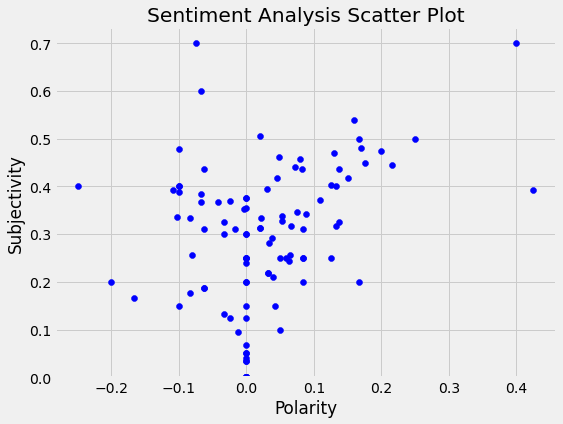

In [18]:
#Plot the polarity and subjectivity
plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color ='blue')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [21]:
#Get the percentage of positive  and negative headlines
pheadlines = df[df.Analysis == 'Positive']
pheadlines = pheadlines['Headline']
#negative
nheadlines = df[df.Analysis == 'Negative']
nheadlines = nheadlines['Headline']

ppercentage = round((pheadlines.shape[0]/df.shape[0])*100, 1)
npercentage = round((nheadlines.shape[0]/df.shape[0])*100, 1)

print(ppercentage, npercentage)

45.0 27.5


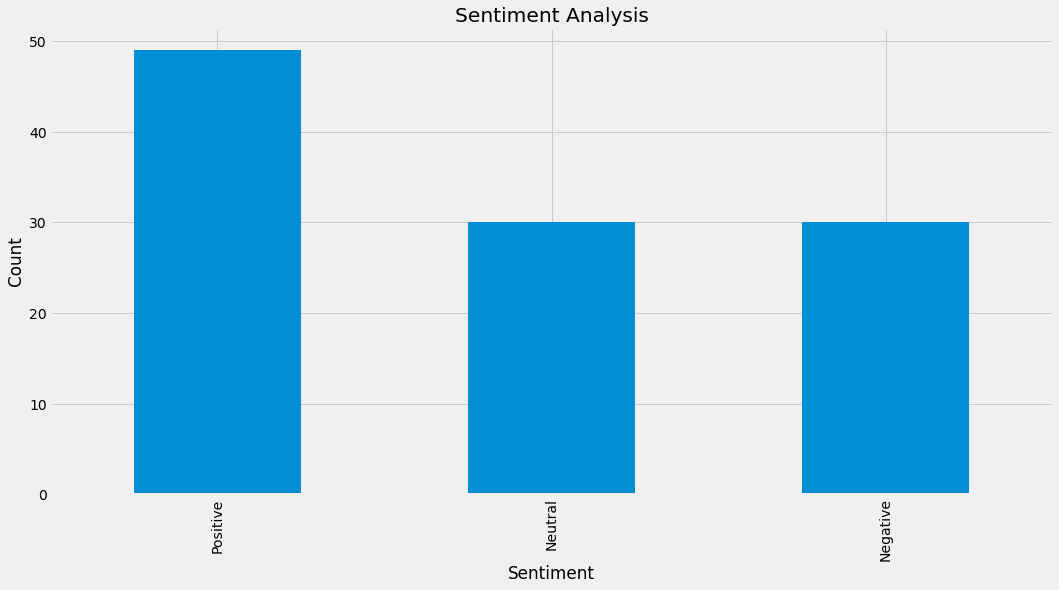

In [23]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and visualise counts
plt.figure(figsize = (16,8))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()